[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1kF23O4PfiGhOUnhU7t62HQJWrZ_-d7d1?usp=sharing) 

# Q1. Task -> `Animate bivariate normal distribution given at` [link]('https://en.wikipedia.org/wiki/Multivariate_normal_distribution').

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets 
import matplotlib.transforms as transforms
from matplotlib.patches import Ellipse

In [5]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

> Note: In the backend, the confidence ellipse function written was not working while using with ipywidgets for animating.

In [134]:
def gaussian(x, mean, variance):
  return 1 / (variance / np.sqrt(2 * np.pi)) * np.exp(-0.5 * (x - mean)**2 / variance**2)

@widgets.interact(a = (1,8,0.2),b = (0.2,1,0.1))
def plott(a,b):
  means = [a,a]
  variances = [b, b]
  placeholder = np.arange(0, 8, 0.01)

  epsilon = np.random.normal(size=(300, 2))
  x = np.array(means) + np.exp(0.5 * np.array(variances)) * epsilon

  fig = plt.figure(figsize = (10,10))
  ax = fig.add_subplot(1,1,1, projection = '3d')

  ax.plot(placeholder, gaussian(placeholder, means[0], variances[0]), zs=8, zdir='y')
  ax.plot(placeholder, gaussian(placeholder, means[1], variances[1]), zs=0, zdir='x')
  ax.plot(x[:,0], x[:,1], '+', markersize=2, color='r', zdir='z', zs=0)



  ax.legend()
  ax.set_xlim(0, 8)
  ax.set_ylim(0, 8)
  ax.set_zlim(0, 4)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')


interactive(children=(FloatSlider(value=4.0, description='a', max=8.0, min=1.0, step=0.2), FloatSlider(value=0…

> ***The above code partially satisfies the replication process asked for the task required***

# Q2: Task -> `Implement from scratch a sampling method to draw samples from a multivariate Normal (MVN) distribution in JAX`.

Approach:

1. Since we were restricted to use only jax.random.uniform and not allowed to use jax.random.normal; therefore we applied Central Limit Theorm to achieve the above task.



#### Firstly, Numpy Implementation of the above task using 

In [131]:
import numpy as np
import scipy.linalg as spla 
import statistics as stat
import timeit

In [124]:
def sample_mean_calculator(population_array, sample_size, n_samples):
  sample_means = []
  for i in range(n_samples):
    sample = np.random.choice(population_array, size=sample_size, replace=False)
    sample_mean = stat.mean(sample)
    sample_means.append(sample_mean)
  return sample_means

In [125]:
def multivariate_normal_sampler(mean, covariance, n_samples = 1):
  L = spla.cholesky(covariance)
  Z = np.random.uniform(size = (n_samples, covariance.shape[0]))
  final = dict()
  for i in range(Z.shape[1]):
    a = sample_mean_calculator(Z[:,i],10,n_samples)
    final[i] = a
  Z = np.array(list(final.values())).T
  return Z.dot(L) + mean 

In [139]:
# Randomly assigning mean values of required dimentions as 10
mean = np.random.randint(low = 1, high = 10,size = (10,)) # mean

# Covariance matrix
vec=np.random.choice([1,10],10)
cov=np.diag(vec)

# Running our multivariate random sampler
start = timeit.timeit()
X = multivariate_normal_sampler(mean = mean,covariance= cov,n_samples =  100)
end = timeit.timeit()

# Samples drawn from multivariate normal distribution taken for 10 dimentions
print(f'Time taken to complete the operation : {end - start}s \n\nsample drawn are are :{X}') 

Time taken to complete the operation : -0.00601246199948946s 

sample drawn are are :[[ 3.46249025  2.74288717  4.42100355  7.18285195  5.47282892  3.56279088
   8.74425244  7.46574168  9.7739732   9.88144506]
 [ 3.51045932  2.17142193  4.65701842  6.632162    5.49987468  3.52866164
   8.83113258  7.51075888  9.8404424   9.69320599]
 [ 3.55636704  2.84781127  4.60712837  6.82791794  5.58043154  3.51536764
   7.95732829  7.52386915  9.53466452  9.70253907]
 [ 3.4545766   2.38560521  4.41247763  7.27097263  5.50378402  3.37072057
   8.37067579  7.42342271  9.62587805  9.77889221]
 [ 3.55908371  2.27503017  4.59744932  6.76213284  5.45690404  3.49605276
   7.91709151  7.60547234  9.78040043  9.97214581]
 [ 3.43828568  2.19794923  4.58821108  6.44506298  5.6587654   3.5230138
   8.59321646  7.62416892  9.89817854  9.08511015]
 [ 3.36005408  2.4515706   4.62063403  6.83032077  5.43228602  3.44826932
   8.52409897  7.58343033  9.71755217  9.59745992]
 [ 3.51373481  2.27418494  4.53065254  6.

#### Implemnting the above task with JAX:

> Note: 
-  *Due to internal functioning inside JIT and JAX; The program has retained its state values thus it is not behaving like above numpy's implementation.*

> - Possible error can be due to outputs applying central limit theory on samples from unifrom distribution taken using `jax.random.uniform`

In [119]:
import jax
import jax.numpy as jnp
import jax.scipy.linalg as jspla
import numpy as np
from jax import random
import scipy.linalg as spla 
import statistics as stat

key = random.PRNGKey(2022)

In [120]:
def sample_mean_calculator(population_array, sample_size, n_samples):
  sample_means = []
  for i in range(n_samples):
    sample = jax.random.choice(key,population_array, shape=sample_size, replace=False)
    sample_mean = jnp.mean(sample)
    sample_means.append(sample_mean)
  return sample_means

In [121]:
def multivariate_normal_sampler(mean, covariance, n_samples = 1):
  L = jspla.cholesky(covariance)
  Z = jax.random.uniform(key,shape = (n_samples, covariance.shape[0]))
  final = dict()
  for i in range(Z.shape[1]):
    a = sample_mean_calculator(Z[:,i],(10,),n_samples)
    final[i] = a
  Z = np.array(list(final.values())).T
  return Z.dot(L) + mean 

In [137]:
# Mean; where chosen number of dimenation is 10
mean = jax.random.randint(key, minval = 1, maxval = 10,shape = (10,))

# Covariance matrix; where chosen number of dimenation is 10
choice = np.arange(1,10)
vec= jax.random.choice(key,choice,shape = (10,))
cov=jnp.diag(vec)

start = timeit.timeit()

X = multivariate_normal_sampler(mean = mean,covariance= cov,n_samples =  1000)
end = timeit.timeit()

# Samples drawn from multivariate normal distribution taken for 10 dimentions
print(f'Time taken to complete the operation : {end - start}s \n\nsample drawn are are :{X}')  

Time taken to complete the operation : 6.340599975374062e-05s 

sample drawn are are :[[ 1.5330501 10.46107    2.5246618 ...  5.9602556  8.640578   4.1225977]
 [ 1.5705996 10.732185   2.878772  ...  6.385895   8.264776   4.071474 ]
 [ 1.4356376 10.6438875  2.5318875 ...  6.320963   8.433107   3.8125887]
 ...
 [ 1.4562821 10.942941   2.9777617 ...  5.711292   8.280092   3.6656978]
 [ 1.5777533 10.580234   3.0166008 ...  5.9953814  8.261091   4.2226977]
 [ 1.4329877 10.484482   2.7692142 ...  6.118839   8.370116   3.7071733]]


# Q3. Task : `2-layer MLP training on Mnist Dataset using JAX from scratch.`

We will need the following functions to train a Multilayer Perceptron:

- A function that initializes the neural networks weights and returns a list of layer-specific parameters.
- A function that performs a forward pass through the network (e.g. by loop over the layers).
- A function that computes the cross-entropy loss of the predictions.
- A function that evaluates the accuracy of the network (simply for logging).
- A function that updates the parameters using some form of gradient descent.
- All of these will then be tied together in a training loop. We start by importing some additional helpers (including the optimizers from JAX) and the dataset from PyTorch. Any other dataloader will do the job similarly as long as transform the inputs to JAX-NumPy arrays.


A look at the MNIST Handwritten dataset
<img src = 'https://miro.medium.com/max/800/1*LyRlX__08q40UJohhJG9Ow.png' align = ''>

`Disclaimer` : We will need a function that initializes the weights in our MLP. We will pass a list of hidden layer sizes and the previously generated PRNG key. We need to split the key iteratively to generate the individual weights of our network. Let’s see how this is done for a MLP that takes the flat MNIST image as an input (28 x 28 = 784) and has two hidden layers with 512 units (e.g. 784-512-512-10).

In [106]:
import numpy as np
import jax.numpy as jnp
from jax.scipy.special import logsumexp
import jax
from jax import jit, vmap, pmap, grad, value_and_grad
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

seed = 0
mnist_img_size = (28, 28)

def init_MLP(layer_widths, parent_key, scale=0.01):

    params = []
    keys = jax.random.split(parent_key, num=len(layer_widths)-1)

    for in_width, out_width, key in zip(layer_widths[:-1], layer_widths[1:], keys):
        weight_key, bias_key = jax.random.split(key)
        params.append([
                       scale*jax.random.normal(weight_key, shape=(out_width, in_width)),
                       scale*jax.random.normal(bias_key, shape=(out_width,))
                       ]
        )

    return params

# test
key = jax.random.PRNGKey(seed)
MLP_params = init_MLP([784, 512, 256, 10], key)
print(jax.tree_map(lambda x: x.shape, MLP_params))

[[(512, 784), (512,)], [(256, 512), (256,)], [(10, 256), (10,)]]


Preparing the dataloader using torch `DataLoader` class and `numpy` functions

In [107]:
def custom_transform(x):
    return np.ravel(np.array(x, dtype=np.float32))

def custom_collate_fn(batch):
    transposed_data = list(zip(*batch))

    labels = np.array(transposed_data[1])
    imgs = np.stack(transposed_data[0])

    return imgs, labels

batch_size = 128
train_dataset = MNIST(root='train_mnist', train=True, download=True, transform=custom_transform)
test_dataset = MNIST(root='test_mnist', train=False, download=True, transform=custom_transform)

train_loader = DataLoader(train_dataset, batch_size, shuffle=True, collate_fn=custom_collate_fn, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size, shuffle=False, collate_fn=custom_collate_fn, drop_last=True)

# testing our train dataloaders
batch_data = next(iter(train_loader))
imgs = batch_data[0]
lbls = batch_data[1]
print(imgs.shape, imgs[0].dtype, lbls.shape, lbls[0].dtype)

# optimization - loading the whole dataset into memory
train_images = jnp.array(train_dataset.data).reshape(len(train_dataset), -1)
train_lbls = jnp.array(train_dataset.targets)

test_images = jnp.array(test_dataset.data).reshape(len(test_dataset), -1)
test_lbls = jnp.array(test_dataset.targets)

(128, 784) float32 (128,) int64


We can now put things together into a single update function that computes the gradient of the loss with respect to the parameters for a batch. We use the predefined optimizers and choose Adam to be our optimizer for the initialized parameters and we are ready!

In [108]:
def MLP_predict(params, x):
    hidden_layers = params[:-1]

    activation = x
    for w, b in hidden_layers:
        activation = jax.nn.relu(jnp.dot(w, activation) + b)

    w_last, b_last = params[-1]
    logits = jnp.dot(w_last, activation) + b_last

    # log(exp(o1)) - log(sum(exp(o1), exp(o2), ..., exp(o10)))
    # log( exp(o1) / sum(...) )
    return logits - logsumexp(logits)


''' Code for user's reference, uncomment to further understand!'''
# # test single example
# dummy_img_flat = np.random.randn(np.prod(mnist_img_size))
# # print(dummy_img_flat.shape)
# prediction = MLP_predict(MLP_params, dummy_img_flat)
# # print(prediction.shape)

# test batched function
batched_MLP_predict = vmap(MLP_predict, in_axes=(None, 0))

dummy_imgs_flat = np.random.randn(16, np.prod(mnist_img_size))
# print(dummy_imgs_flat.shape)               # uncomment for further understanding
predictions = batched_MLP_predict(MLP_params, dummy_imgs_flat)
# print(predictions.shape)                # uncomment for further understanding

Having setup everything - it is time to run the learning loop for the 2-layer MLP!

In [117]:
num_epochs = 11

def loss_fn(params, imgs, gt_lbls):
    predictions = batched_MLP_predict(params, imgs)

    return -jnp.mean(predictions * gt_lbls)

def accuracy(params, dataset_imgs, dataset_lbls):
    pred_classes = jnp.argmax(batched_MLP_predict(params, dataset_imgs), axis=1)
    return jnp.mean(dataset_lbls == pred_classes)

@jit
def update(params, imgs, gt_lbls, lr=0.01):
    loss, grads = value_and_grad(loss_fn)(params, imgs, gt_lbls)

    return loss, jax.tree_multimap(lambda p, g: p - lr*g, params, grads)

# Create a MLP
MLP_params = init_MLP([np.prod(mnist_img_size), 512, 256, len(MNIST.classes)], key)
loss_list = []
iterations = []

for epoch in range(num_epochs):

    for cnt, (imgs, lbls) in enumerate(train_loader):

        gt_labels = jax.nn.one_hot(lbls, len(MNIST.classes))
        
        loss, MLP_params = update(MLP_params, imgs, gt_labels)
        if cnt <= 200 and epoch < 1:
          loss_list.append(loss)
          iterations.append(cnt)
        # if cnt % 50 == 0:
            # print(loss)
    print('-----------------------------------------------------------------')
    print(f'Epoch {epoch} | Training Accuracy : {accuracy(MLP_params, train_images, train_lbls):.4f} | Test Accuracy :  = {accuracy(MLP_params, test_images, test_lbls):.4f}')

-----------------------------------------------------------------
Epoch 0 | Training Accuracy : 0.9138 | Test Accuracy :  = 0.9162
-----------------------------------------------------------------
Epoch 1 | Training Accuracy : 0.9348 | Test Accuracy :  = 0.9341
-----------------------------------------------------------------
Epoch 2 | Training Accuracy : 0.9467 | Test Accuracy :  = 0.9440
-----------------------------------------------------------------
Epoch 3 | Training Accuracy : 0.9543 | Test Accuracy :  = 0.9493
-----------------------------------------------------------------
Epoch 4 | Training Accuracy : 0.9591 | Test Accuracy :  = 0.9554
-----------------------------------------------------------------
Epoch 5 | Training Accuracy : 0.9640 | Test Accuracy :  = 0.9587
-----------------------------------------------------------------
Epoch 6 | Training Accuracy : 0.9685 | Test Accuracy :  = 0.9634
-----------------------------------------------------------------
Epoch 7 | Trainin

## Plotting Loss v/s Iteration Curve:

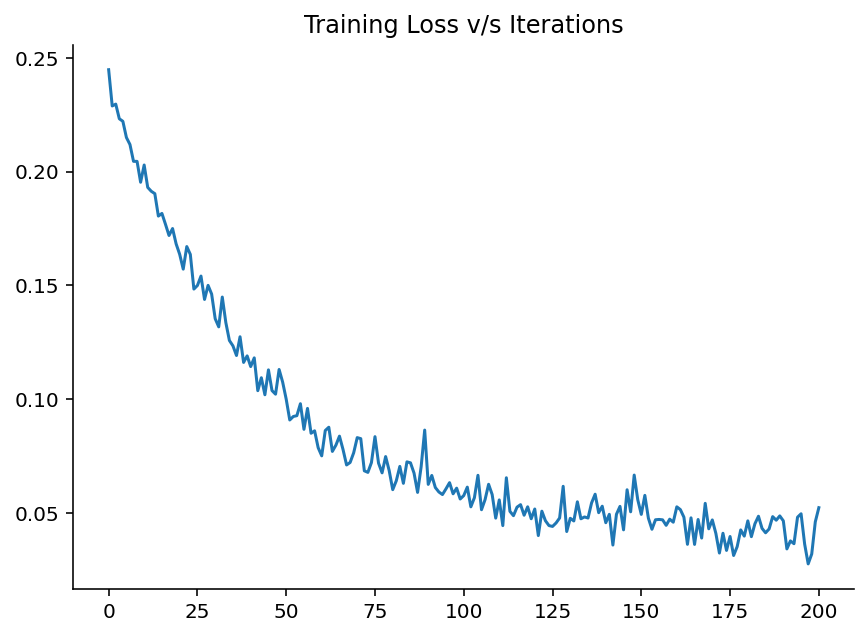

In [118]:
plt.plot(iterations, loss_list)
plt.title('Training Loss v/s Iterations')
plt.show()  # as we can see, the loss is going down and we are getting greater accuracy of up to ~ 96%

### Visualizing some of the sample values:

In [30]:
import ipywidgets as widgets
import matplotlib.pyplot as plt

@widgets.interact()
def interactive_pred(a = (0,100)):
  imgs, lbls = next(iter(test_loader))
  img = imgs[a].reshape(mnist_img_size)
  gt_lbl = lbls[a] 
  pred = jnp.argmax(MLP_predict(MLP_params, np.ravel(img)))
  print('Actual Label - >', gt_lbl)
  print('predictions - > ', pred)
  plt.imshow(img); 
  plt.show()

interactive(children=(IntSlider(value=50, description='a'), Output()), _dom_classes=('widget-interact',))

(512, 784)
(28, 28)


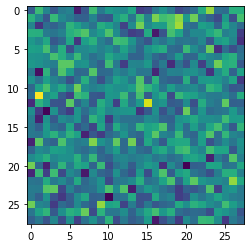

In [34]:
# Visualizing inside operation after one hidden layer operation
w = MLP_params[0][0]
print(w.shape)
w_single = w[500, :].reshape(mnist_img_size)
print(w_single.shape)
plt.imshow(w_single); plt.show()

# Q4. Task : `Bayesian Linear Regression from scratch`

We will start with some simulated data, given certain parameters, such as weights, bias and sigma.

The linear regression can be expressed by the following equation:


<img src = 'https://miro.medium.com/max/1400/1*75bg1NKyP3zWfDJPTN2mvQ.png'>


> [[image_source]('https://online.stat.psu.edu/stat462/node/132/')]


where the observed dependent variable Y is a linear combination of data (X) times weights (W), and add the bias (b).

Loading the necessary files:

In [72]:
from __future__ import print_function
from sklearn.datasets import make_regression
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.distributions.normal import Normal
from torch.distributions.uniform import Uniform
from torch.distributions.exponential import Exponential
import jax
from jax import random
from jax import grad, jit
import jax.numpy as np # using jax.numpy instead
!pip install numpyro -q
!pip install blackjax -q
import blackjax
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS

sample: 100%|██████████| 1000/1000 [00:15<00:00, 66.15it/s, 7 steps of size 6.80e-01. acc. prob=0.93]


Simulating the data:

Here we have `100 observations`, `1 weight`, `1 bias`, and `1 sigma`.

In [99]:
N = 100
J = 1
X = random.normal(random.PRNGKey(seed = 123), (N, J))
weight = np.array([1.5])
error = random.normal(random.PRNGKey(234), (N, )) # standard Normal
b = 10.5
y_obs = X @ weight + b + error
y = y_obs.reshape((N, 1))
X = jax.device_get(X) # convert jax array into numpy array
y = jax.device_get(y) # convert jax array into numpy array
x_data = Variable(torch.from_numpy(X), requires_grad=True)
y_data = Variable(torch.from_numpy(y), requires_grad=True)

Using the `No-U-Turn Sampler (NUTS)` to estimate the parameters in the linear model. For our implementation its, likelihood-based. 

Note:  `It can be a distance-based method as well with a loss function (akin to Approximate Bayesian Computation)`

In [101]:
def model(X, y=None):
    ndims = np.shape(X)[-1]
    ws = numpyro.sample('betas', dist.Normal(0.0,10*np.ones(ndims)))
    b = numpyro.sample('b', dist.Normal(0.0, 10.0))
    sigma = numpyro.sample('sigma', dist.Uniform(0.0, 10.0))
    mu = X @ ws + b
    return numpyro.sample("y", dist.Normal(mu, sigma), obs = y)

The model is fitted by the NUTS sample -:

In [102]:
X = jax.device_put(X) # convert numpy array into jax array
y = jax.device_put(y) # convert numpy array into jax array
nuts_kernel = NUTS(model)
num_warmup, num_samples = 500, 500
mcmc = MCMC(sampler = nuts_kernel, num_warmup = num_warmup, num_samples = num_samples)
mcmc.run(random.PRNGKey(0), X, y = y_obs)
# mcmc.get_samples()

sample: 100%|██████████| 1000/1000 [00:10<00:00, 96.23it/s, 3 steps of size 7.60e-01. acc. prob=0.90]


In [103]:
mcmc.print_summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
         b     10.33      0.10     10.33     10.16     10.49    546.04      1.01
  betas[0]      1.62      0.10      1.62      1.48      1.82    568.35      1.00
     sigma      1.08      0.08      1.07      0.96      1.20    421.34      1.00

Number of divergences: 0


In [104]:
X.shape, y_obs.shape

((100, 1), (100,))

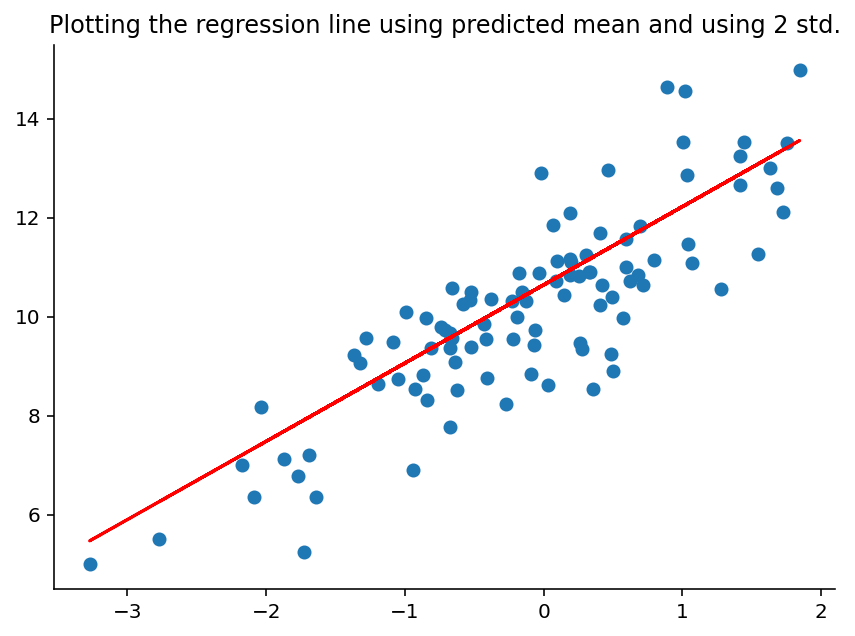

In [105]:
import matplotlib.pyplot as plt
plt.scatter(X, y_obs)
w = 1.58
b = 10.64
Y = [x*w + b for x in X]
plt.plot(X,Y, 'r-')
plt.title('Plotting the regression line using predicted mean and using 2 std.')
plt.show()

# References : 

- https://jax.readthedocs.io/en/latest/notebooks/quickstart.html
- https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html
- https://juanitorduz.github.io/multivariate_normal/
- https://towardsdatascience.com/bayesian-linear-regression-with-bambi-a5e6570f167b 
- https://num.pyro.ai/en/fix-docs/mcmc.html 
- https://peterroelants.github.io/posts/multivariate-normal-primer/ 
- https://online.stat.psu.edu/stat462/node/132/
- 


-----------------------------------------------------------END------------------------------------------------------

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1kF23O4PfiGhOUnhU7t62HQJWrZ_-d7d1?usp=sharing) 